# Embedding IMDB on CPU/GPU

In [1]:
import os
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

### Perform measurements

In [3]:
num_trials = 20
num_samples = np.linspace(5000, 20000, 4).astype(int)
trial_dir = 'trials'

In [ ]:
os.system('mkdir -p {}'.format(trial_dir))
curr = 0
for num_sample in num_samples:
    for device in ['cpu', 'gpu']:
        for _ in range(num_trials):
            output_path = os.path.join(trial_dir, "{}.json".format(curr))
            cmd = 'python3 perform_embedding.py -c {} -d {} -o {}'.format(
                num_sample,
                device,
                output_path
            )
            os.system(cmd)
            curr += 1

In [5]:
data_list = list()
for fname in os.listdir(trial_dir):
    if fname.endswith(".json"):
        with open(os.path.join(trial_dir, fname), "r") as fin:
            data_list.append(json.load(fin))
df = pd.DataFrame(data_list)
df.head()

,device,sample_size,vectorization_time,embedding_time
0,gpu,15000,0.619141,0.004412
1,gpu,5000,0.225927,0.003448
2,cpu,10000,0.433976,0.009604
3,gpu,20000,0.831029,0.005023
4,cpu,20000,0.784722,0.015352


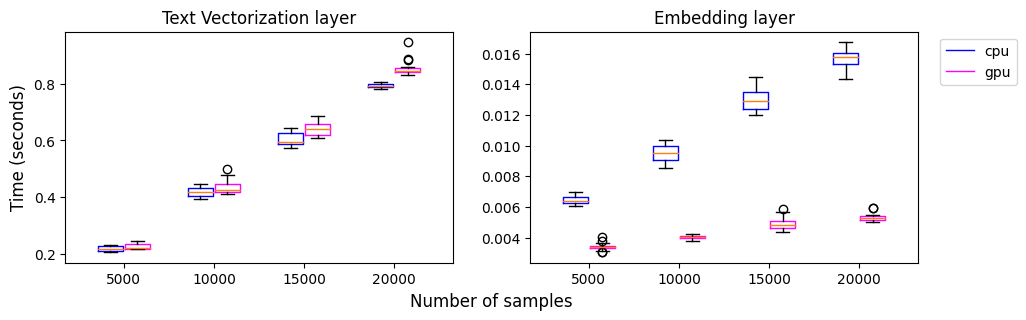

In [27]:
fig = plt.figure(figsize=(11, 2.5))

ax = fig.add_subplot(111)
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.set_title("Text Vectorization layer")
ax2.set_title("Embedding layer")
ax.set_xlabel("Number of samples", fontsize=12)
ax.set_ylabel("Time (seconds)", fontsize=12)
x_vals = np.linspace(1, len(num_samples), len(num_samples)).astype(int)

ax_list = [ax1, ax2]
for idx, name in enumerate(['vectorization_time', 'embedding_time']):
    ax_curr = ax_list[idx]
    for device in ['cpu', 'gpu']:
        curr_data = list()
        for num_sample in num_samples:
            sub_df = df[(df.device == device) & (df.sample_size == num_sample)]
            curr_data.append(sub_df[name].values)
    
        if device == 'cpu':
            bp1 = ax_curr.boxplot(
                curr_data,
                positions=[x - 0.15 for x in x_vals],
                widths=0.28,
                boxprops=dict(color='blue')
            )
        else:
            bp2 = ax_curr.boxplot(
                curr_data,
                positions=[x + 0.15 for x in x_vals],
                widths=0.28,
                boxprops=dict(color='tab:brown')
            )

    if idx == 1: 
        ax_curr.legend(
            [bp1["boxes"][0], bp2["boxes"][0]],
            ['cpu', 'gpu'],
            bbox_to_anchor=(1.04, 1),
            loc="upper left"
        )
    
    ax_curr.set_xticks(x_vals)
    ax_curr.set_xticklabels(num_samples)

plt.savefig('embedding_measurement.pdf', bbox_inches='tight')